In [0]:
import cv2
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


import os
import random

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
TRAINDIR = '/content/drive/My Drive/Covid project/Dataset COVID-19 Augmented'
CATEGORIES = ["covid","normal"]

In [0]:
nrows = 300
ncolumns = 300
channels = 3

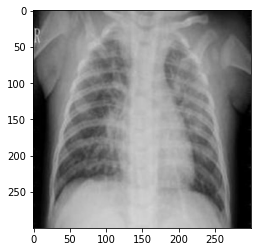

In [0]:
train_data=[]
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(TRAINDIR,category)      # path to Covid or Normal directory
        class_num = CATEGORIES.index(category)
       
        for image in os.listdir(path):             # Bunch of images in the path
            
            image_array1 = cv2.imread(os.path.join(path,image),cv2.IMREAD_COLOR) 
            
            new_array1 = cv2.resize(image_array1,(nrows,ncolumns))       # Normalising sizes of all pics to (150,150) 
            
           
            imgplot=plt.imshow(new_array1)
            
            train_data.append([new_array1,class_num])        # Collecting all training data along with indices   
            
create_training_data()

In [0]:
len(train_data)    # Total number of images ------ covid+normal

1824

In [0]:
np.array(train_data).shape

(1824, 2)

In [0]:
random.shuffle(train_data)

This is the xray of a normal person


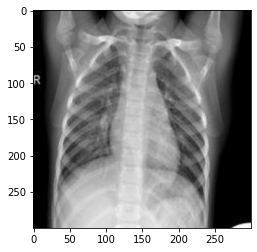

In [0]:
plt.imshow(train_data[0][0],cmap='gray')
if(train_data[0][1] == 0):
    print('This is the xray of a person diagnosed with covid')
else:
    print('This is the xray of a normal person')
plt.show()  

This is the xray of a person diagnosed with covid


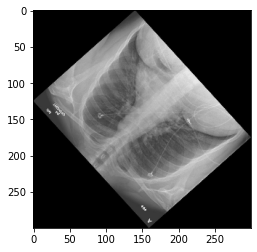

In [0]:
plt.imshow(train_data[1][0],cmap='gray')
if(train_data[1][1] == 0):
    print('This is the xray of a person diagnosed with covid')
else:
    print('This is the xray of a normal person')
plt.show()  

This is the xray of a normal person


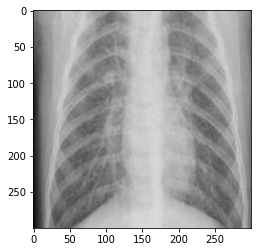

In [0]:
plt.imshow(train_data[2][0],cmap='gray')
if(train_data[2][1] == 0):
    print('This is the xray of a person diagnosed with covid')
else:
    print('This is the xray of a normal person')
plt.show()  

In [0]:
X = []
y = []

for feature,label in train_data:
    X.append(feature)
    y.append(label)
    
X = np.array(X).reshape(-1,nrows,ncolumns,3)
y = np.array(y)

In [0]:
print(X.shape)
print(len(X))

(1824, 300, 300, 3)
1824


In [0]:
print(y.shape)
print(len(y))

(1824,)
1824


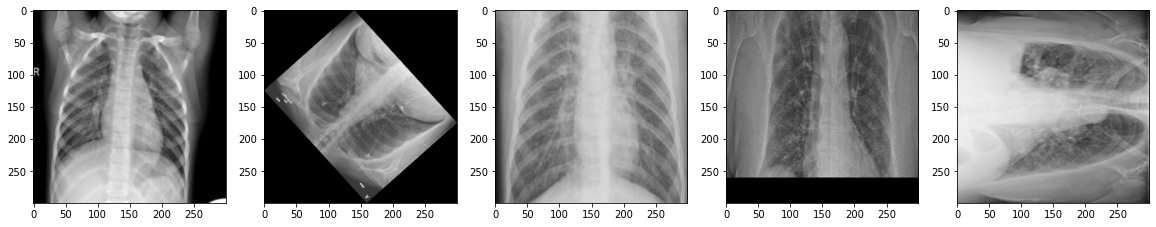

In [0]:
plt.figure(figsize=(20,20))
columns = 5
for i in range(columns):
    plt.subplot(5/columns, columns, i+1)
    plt.imshow(X[i])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=2)

Text(0.5, 1.0, 'Labels for covid and normal')

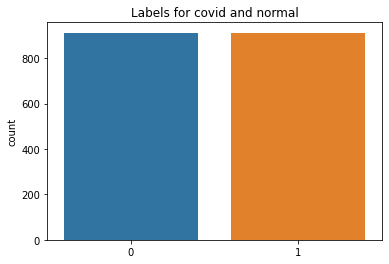

In [0]:
import seaborn as sns
sns.countplot(y)
plt.title('Labels for covid and normal')

In [0]:
#We will use a batch size of 32. Note: batch size should be a factor of 2.***4,8,16,32,64...***
batch_size = 32
ntrain = len(X_train)
nval = len(X_val)


In [0]:
from keras import layers   
from keras import models    
from keras import optimizers    
from keras.preprocessing.image import ImageDataGenerator 
from keras.preprocessing.image import img_to_array, load_img

model = models.Sequential()   # Here we create a sequential model. This tells keras to stack all layers sequentially.
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(nrows, ncolumns, channels)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))  #Dropout for regularization
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  #Sigmoid function at the end because we have just two classes

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 128)      

In [0]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [0]:
train_datagen = ImageDataGenerator(rescale=1/255,   
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1/255) 

In [0]:
train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)

In [0]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=ntrain // batch_size,
                              epochs=64,
                              validation_data=val_generator,
                              validation_steps=nval // batch_size)

Epoch 1/64
45/45 [==============================] - 29s 651ms/step - loss: 0.6322 - acc: 0.6286 - val_loss: 0.4695 - val_acc: 0.7074
Epoch 2/64
45/45 [==============================] - 29s 644ms/step - loss: 0.4511 - acc: 0.7863 - val_loss: 0.3940 - val_acc: 0.7628
Epoch 3/64
45/45 [==============================] - 29s 642ms/step - loss: 0.4123 - acc: 0.8024 - val_loss: 0.2635 - val_acc: 0.9099
Epoch 4/64
45/45 [==============================] - 29s 636ms/step - loss: 0.3437 - acc: 0.8493 - val_loss: 0.2669 - val_acc: 0.9489
Epoch 5/64
45/45 [==============================] - 29s 639ms/step - loss: 0.3490 - acc: 0.8458 - val_loss: 0.1294 - val_acc: 0.9339
Epoch 6/64
45/45 [==============================] - 29s 643ms/step - loss: 0.2931 - acc: 0.8718 - val_loss: 0.1436 - val_acc: 0.9610
Epoch 7/64
45/45 [==============================] - 29s 647ms/step - loss: 0.2742 - acc: 0.8931 - val_loss: 0.0871 - val_acc: 0.9760
Epoch 8/64
45/45 [==============================] - 29s 651ms/step - 

In [0]:
#lets plot the train and val curve
#get the details form the history object
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [0]:
TESTDIR = '/content/drive/My Drive/Covid project/COVID_TEST'
CATEGORIES = ["covid","normal"]

In [0]:
nrows = 300
ncolumns = 300
channels = 3

In [0]:
train_data=[]
def create_test_data():
    for category in CATEGORIES:
        path = os.path.join(TESTDIR,category)      # path to apple or orange directory
        class_num = CATEGORIES.index(category)
       
        for image in os.listdir(path):             # Bunch of images in the path
            
            image_array1 = cv2.imread(os.path.join(path,image)) 
            
            new_array1 = cv2.resize(image_array1,(nrows,ncolumns))       # Normalising sizes of all pics to (150,150) 
            
            train_data.append([new_array1,class_num])        # Collecting all training data along with indices 

create_test_data()

In [0]:
len(train_data)

In [0]:
random.shuffle(train_data)

In [0]:
X = []
y = []

for feature,label in train_data:
    X.append(feature)
    y.append(label)
    
X = np.array(X).reshape(-1,nrows,ncolumns,3)  
y = np.array(y)

In [0]:
len(X)

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.9,random_state=2)

In [0]:
'''
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(nrows, ncolumns, channels)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))  #Dropout for regularization
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  #Sigmoid function at the end because we have just two classes

'''

In [0]:
#model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [0]:
len(X_val)

In [0]:
'''
train_datagen = ImageDataGenerator(rescale=1/255,   
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1/255) 
'''

In [0]:
#train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
#val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)

In [0]:
'''
history = model.fit_generator(train_generator,
                              steps_per_epoch=ntrain // batch_size,
                              epochs=64,
                              validation_data=val_generator,
                              validation_steps=nval // batch_size)
'''

In [0]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [0]:
i = 0
text_labels = []
plt.figure(figsize=(30,20))
for batch in test_datagen.flow(X, batch_size=1):
    pred = model.predict(batch)
    if pred > 0.5:
        text_labels.append('normal')
    else:
        text_labels.append('covid')
    plt.subplot(5 / columns + 1, columns, i + 1)
    plt.title('This is a ' + text_labels[i])
    color_img = cv2.cvtColor(batch[0], cv2.COLOR_BGR2RGB)
    imgplot=plt.imshow(color_img)
    plt.savefig('fig')
    i += 1
    if i % 10 == 0:
        break
plt.show()

In [0]:
i = 0
text_labels = []
plt.figure(figsize=(30,20))
for batch in test_datagen.flow(X, batch_size=1):
    pred = model.predict(batch)
    if pred > 0.5:
        text_labels.append('normal')
    else:
        text_labels.append('covid')
    plt.subplot(5 / columns + 1, columns, i + 1)
    plt.title('This is a ' + text_labels[i])
    color_img = cv2.cvtColor(batch[0], cv2.COLOR_BGR2RGB)
    imgplot=plt.imshow(color_img)
    plt.savefig('fig')
    i += 1
    if i % 10 == 0:
        break
plt.show()

In [0]:
y_val.shape

In [0]:
predict = model.predict(X_val)

In [0]:
predict = model.predict(X_val)
correct = 0
count = 0
for i in range(len(y_val)):
  count += 1
  if(predict[i][0] >= 0.5):
    if(y_val[i] == 1):
      correct += 1
  else:
    if(y_val[i] == 0):
      correct += 1    
  print(f'{predict[i]} {y_val[i]}')
print(correct/count)  
print(count)